In [108]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Load the data
df = pd.read_csv('../data/processed/igomilsdb_s_cleaned.csv')

df.head()


,Sesso,Eta,BMI,CP,Ist_par_epat,Stadio_cirrosi,Ipert_portale,Ist_lesione,Top_les_princ,Dim_les_princ,Stato_marg_ist,Durata,Tipo_MI,Tipo_res_ep_princ,Entita_perdite,Pringle,Ecografia,Conversione,CCI,Class_CCI
0,1.0,66.0,24.0,1.0,3.0,1.0,0.0,8.0,9.0,35.0,10.0,240,4.0,1.0,100.0,2.0,1.0,0.0,42.573466,2.0
1,1.0,66.0,30.0,0.0,1.0,0.0,0.0,2.0,6.0,31.0,12.0,269,2.0,1.0,150.0,2.0,1.0,0.0,0.000000,0.0
2,1.0,21.0,29.0,1.0,1.0,0.0,0.0,7.0,6.0,130.0,10.0,484,2.0,7.0,100.0,2.0,1.0,0.0,8.660254,0.0
3,2.0,71.0,21.0,1.0,1.0,0.0,0.0,9.0,8.0,180.0,1.0,480,4.0,7.0,3000.0,2.0,1.0,1.0,0.000000,0.0
4,2.0,32.0,23.0,1.0,1.0,0.0,0.0,4.0,4.0,45.0,5.0,209,4.0,1.0,100.0,1.0,1.0,0.0,0.000000,0.0


In [109]:
df = df.drop('CCI', axis=1)
df = df.drop('Class_CCI', axis=1)

In [110]:
#df = df.drop('Durata', axis=1)
#df = df.drop('Entita_perdite', axis=1)

In [111]:
y = df['Conversione']
X = df.drop('Conversione', axis=1)

In [112]:
"""#apply standard scaler and back to dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=copy.columns)

X.head()"""

'#apply standard scaler and back to dataframe\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nX = scaler.fit_transform(X)\nX = pd.DataFrame(X, columns=copy.columns)\n\nX.head()'

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:
from collections import Counter

# Calculate the scale_pos_weight
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]

In [115]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the XGBoost classifier with class imbalance handling
model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,  # Balance the positive class
    n_estimators=100,  # Number of boosting rounds
    max_depth=4,       # Maximum depth of a tree
    learning_rate=0.1, # Step size shrinkage
    subsample=0.8,     # Subsample ratio of the training instance
    colsample_bytree=0.8, # Subsample ratio of columns when constructing each tree
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      1817
         1.0       0.24      0.60      0.34       156

    accuracy                           0.82      1973
   macro avg       0.60      0.72      0.62      1973
weighted avg       0.90      0.82      0.85      1973

[[1517  300]
 [  62   94]]


In [117]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=2
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsampl

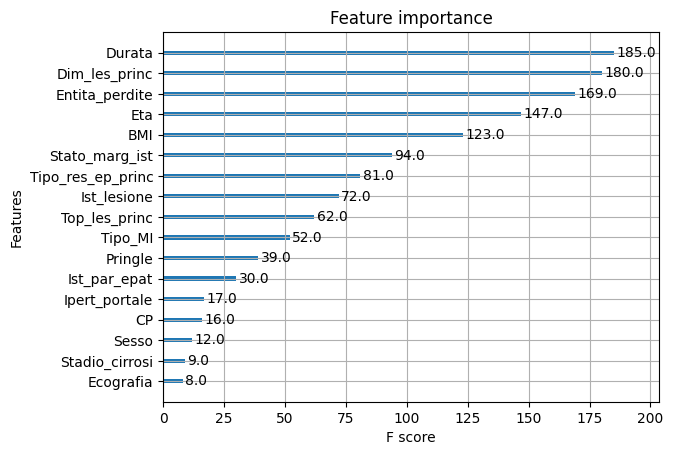

In [118]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()

In [119]:
#confusion matrix with last model

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94      1817
         1.0       0.32      0.42      0.36       156

    accuracy                           0.88      1973
   macro avg       0.63      0.67      0.65      1973
weighted avg       0.90      0.88      0.89      1973

[[1675  142]
 [  90   66]]


In [121]:
import numpy as np
# Assign higher weight to minority class samples
sample_weight = np.where(y_train == 1, 3, 1)

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model with sample weights
model.fit(X_train, y_train, sample_weight=sample_weight)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1817
         1.0       0.39      0.29      0.33       156

    accuracy                           0.91      1973
   macro avg       0.67      0.63      0.64      1973
weighted avg       0.90      0.91      0.90      1973

[[1748   69]
 [ 111   45]]
